# Report02 - Titanic: Machine Learning from Disaster

* 姓名 李晨
* 学号 2018202069


## 任务简介


1. 任务类型：
二元分类，预测灾难中那些人可能幸存下来；

2. 背景介绍：
泰坦尼克号的沉没是历史上最臭名昭着的沉船之一。 1912年4月15日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，在2224名乘客和机组人员中造成1502人死亡。 这场耸人听闻的悲剧震惊了国际社会，并导致了更好的船舶安全规定。造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。 尽管幸存下沉有一些运气因素，但有些人比其他人更容易生存，比如妇女，儿童和上流社会。在这个挑战中，我们要求您完成对哪些人可能存活的分析。 特别是，我们要求您运用机器学习工具来预测哪些乘客幸免于悲剧。

3. 数据介绍：
* training set (train.csv)   
训练数据包含了891名乘客的信息，信息的格式如下：

|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|乘客ID|幸存与否|船票级别|姓名|性别|年龄|同行的兄弟姐妹或配偶总数|同行的父母或孩子总数|票号|票价|船舱号|登船港口|

将数据读入并快速了解数据

In [1]:
import pandas as pd
import os.path as path
from matplotlib.pyplot import *
def readCsvData(fname):
    fname = path.join('data', fname + '.csv')
    table = pd.read_csv(fname, sep=',')
    return table

train = readCsvData('train')
test = readCsvData('test')
titanic = pd.concat((train, test), sort=True)
print(titanic.info())
#train.head(25)
test.head(25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [2]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False) # ascending=False 降序排列

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

数据中`Age`，`Cabin`，`Embarked`，`Fare`均存在缺失值。

## 解决途径

### 数据的预处理   
原始数据中有一些缺失项和无用项；
`PassengerId`是乘客身份编号，与`Survived`相关性很小，`Cabin`缺失太多，`Ticket`杂乱无章，将这些信息丢弃

In [3]:
PsgIds = titanic.PassengerId
titanic.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
titanic.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0


*数字化类别信息

In [4]:
titanic.describe(include=["O"])

,Embarked,Name,Sex
count,1307,1309,1309
unique,3,1307,2
top,S,"Kelly, Mr. James",male
freq,914,2,843


`Embarked`有三个值，分配为(0,1,2)   
`Sex`有两个值，分配为(0,1)   
`Name`中有效的信息为人名的称呼，从称呼中可以提取到社会信息，我们将`Name`中的“Mr”,"Mrs","Master"等这些信息保留，然后分配类别信息

In [5]:
titanic["Sex"] = titanic["Sex"].map({"female": 1, "male": 0}).astype(int)
titanic["Embarked"] = titanic["Embarked"].map({"S": 0, "C": 1, "Q": 2})
import re
titles = set(re.findall(r', (.*?)\.', t)[0] for t in titanic.Name)
titleDict = dict(zip(titles, range(len(titles))))

# 将信息保存到 Name 列
titanic["Name"] = titanic.Name.str.extract(r', (.*?)\.')
#print(titanic["Name"])
titanic["Name"] = titanic["Name"].map(titleDict).astype(int)


对`Age`，`Embarked`和`Fare`的缺失项进行填充，首先查看每个数据的分布情况

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64
count    1307.000000
mean        0.394797
std         0.653817
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Embarked, dtype: float64
count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64


/Users/lichen/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lichen/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

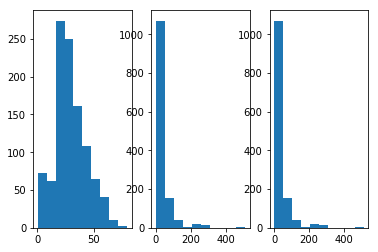

In [6]:
# 查看缺失项的分布情况
print(titanic.Age.describe())
print(titanic.Embarked.describe())
print(titanic.Fare.describe())
subplot(131).hist(titanic.Age)
subplot(132).hist(titanic.Fare)
subplot(133).hist(titanic.Fare)

对缺失项的分布进行分析，对**Age**的缺失项取均值进行填充，对**Embarked**和**Fare**取众数进行填充

In [7]:
# 取众数填充
FareMode = titanic['Fare'].mode().iloc[0]
titanic.fillna({ "Fare": FareMode}, inplace=True)
EmbMode = titanic['Embarked'].mode().iloc[0]
titanic.fillna({ "Embarked": EmbMode}, inplace=True)
AgeMean = titanic['Age'].mean()
titanic.fillna({ "Age": AgeMean}, inplace=True)
# print(titanic.info())

In [8]:
print(titanic.Embarked.describe())

count    1309.000000
mean        0.394194
std         0.653499
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Embarked, dtype: float64


### 构建模型   
此时处理过的信息与`Report01`中的信息有些类似，同时这个问题也是二分类问题，使用KNN模型和随机森林模型进行预测。 

1. 数据预处理

In [9]:
from sklearn.utils import shuffle
# 训练数据与测试数据分离
trainData = titanic[:len(train)]
# 将训练数据打乱
trainData = shuffle(trainData)
#分离标签
y_train = trainData.pop('Survived')
#trainData.drop('Survived', axis=1, inplace = True)
# 划分数据为2:8, 20%的数据用于测试
slash = int(trainData.shape[0] * 0.8)
trainTrain, y_trainTrain = trainData[:slash], y_train[:slash]
testTrain, y_testTrain = trainData[slash: ], y_train[slash: ]

2. KNN模型

In [10]:
#训练KNN模型
from sklearn import neighbors
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
import sklearn

testCaseNum = testTrain.shape[0]
# 对于给定的近邻 K 值，计算其在分配的测试集上的效果
def testNeighborNum(neighborNum):
    start = time.time()
    knn = neighbors.KNeighborsClassifier(n_neighbors=neighborNum, n_jobs=-1)
    knn.fit(trainTrain, y_trainTrain)

    output = knn.predict(testTrain)
    testTime = time.time() - start
    #print(output)
    # 定义判定标准为平均的正确率
    accuracy = accuracy_score(y_testTrain, output)
    TrainTime = time.time() - start
    avpr = average_precision_score(y_testTrain, output)  
    print(f'KNN Train time = {TrainTime:.2f}s')
    return [neighborNum,avpr,accuracy]

选取不同的K值进行实验，并画出K值与预测准确率的关系

In [11]:
total, step = 50, 1
result=[]
for k in range(1, total+1,step):
    result.append(testNeighborNum(k))
#result = np.array(result)


KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.10s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.10s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.10s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.11s
KNN Train time = 0.10s
KNN Train time = 0.11s
KNN Train t

Text(0, 0.5, 'AUC')

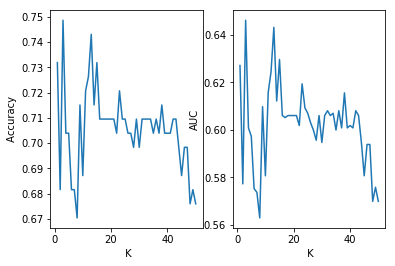

In [12]:
from matplotlib.pyplot import *
result = np.array(result)
figure(1)
ax1 = subplot(121)
plot(result[:,0],result[:,2])
#title(r"$sin^2(x - 2) e^{-x^2}$")
xlabel(' K')
ylabel(' Accuracy ')
ax2 = subplot(122)
plot(result[:,0],result[:,1])
xlabel(' K')
ylabel('AUC')

在之后的测试环节，选择 $K = 13$ 进行测试

3. 随机森林算法   
随机森林是一个包含多个决策树的分类器，输出的类型由输出的类别的众数而定。

In [13]:
#trainData.head(15)

In [14]:
#titanic.head(15)

In [15]:
testData = titanic[len(train):]
#分离标签
testData.pop('Survived')
testData.head(15)
#trainData.drop('Survived', axis=1, inplace = True)
# 划分数据为2:8, 20%的数据用于测试

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp
0,34.500000,2.0,7.8292,3,0,3,0,0
1,47.000000,0.0,7.0000,12,0,3,1,1
2,62.000000,2.0,9.6875,3,0,2,0,0
3,27.000000,0.0,8.6625,3,0,3,0,0
4,22.000000,0.0,12.2875,12,1,3,1,1
5,14.000000,0.0,9.2250,3,0,3,0,0
6,30.000000,2.0,7.6292,0,0,3,1,0
7,26.000000,0.0,29.0000,3,1,2,0,1
8,18.000000,1.0,7.2292,12,0,3,1,0
9,21.000000,0.0,24.1500,3,0,3,0,2


In [16]:
# FareMode = titanic['Fare'].mode().iloc
# titanic.fillna({ "Fare": FareMode}, inplace=True)
# print(testData.Fare.describe())


In [17]:
#testData.info()

In [18]:
from sklearn.ensemble import RandomForestClassifier
# 建立随机森林模型
clf = RandomForestClassifier(n_estimators=500, random_state=0)
clf.fit(trainData, y_train)
# 预测
y_preds = clf.predict(testData)

In [19]:
testPsgIds = PsgIds[len(train):].values
submitFile = path.join('data', 'submit_probRf.csv')
with open(submitFile, 'w+') as f:
    print('PassengerId', 'Survived', sep=',', file=f)
    for testPsgId, y_pred in zip(testPsgIds, y_preds):
        print(testPsgId, int(y_pred), sep=',', file=f)
        

随机森林准确率76.555%

## 总结
这次报告任务是实现对灾难中幸存人员预测，也是一个二分类问题。报告中我们使用了KNN近邻算法以及随机森林算法。这次报告的主要工作是对数据进行处理，我们将有很多缺失值的和部分无用的数据进行了舍弃，对部分缺失值进行简单的数据分析并进行补全，对所有的数据进行了数字化。
在分类任务中，使用有效的分类算法很重要，对数据进行预处理分析也是十分重要的。